In [1]:
import StoneSkip2
import densityPlot
import densityPlot2

<div align="center"> 
    
# Modelling a Skipping Stone
    Daniel Valmassei
    

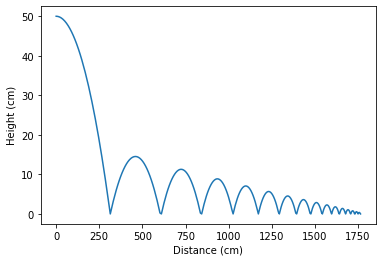

(16, 1764.7294971066437)

In [2]:
StoneSkip2.skipPlot(0.2, 0.0, 0.0, 50.0, 1000)

## Introduction 
A skipping stone can be modeled by a series of systems of ordinary differential equations. These systems are identical to ordinary projectile motion accounting for drag force, whose initial conditions are derived from the final conditions of the previous system. These continue until a stopping condition is reached.

![Ideal Stone](https://aapt.scitation.org/na101/home/literatum/publisher/aip/journals/content/pte/2019/pte.2019.57.issue-5/1.5098910/20190417/images/medium/1.5098910.figures.online.f2.jpg)


## Derivation of Equations of Motion
Assume that we have a spin stabilized, hockey puck shaped stone with face area $A = \pi R^2$ and mass density $q_s$ such that the mass of the stone is $m_s = \rho_s R^2 h$ where $R$ is the radius and $h$ is the height of the stone.

The stone is launched from a height $y_0$ with two-dimensional velocity $\dot{s}_{x0}$ and $\dot{s}_{y0}$ at some angle $\alpha$ to the horizon. From these, the stone travels at an angle $\beta = tan^{-1}(\dot{s}_y/\dot{s}_x)$ to the horizon.

### Flight
Factoring aerodynamic drag into the accelerations $\ddot{s}_x = F_{dx} / m_s$ and $\ddot{s}_y = -g + F_{dy} / m_s$, where $g$ is the acceleration due to gravity and 
$$
|F_d| = \frac{1}{2} \rho_{air} C_D A_s |v|^2
$$

is the drag force where $\rho_{air}$ is the density of air ($0.00122 g/cm^3$), $C_d = 0.5$ is the drag coefficient. These accelerations provide a system of differential equations that fully model a single flight of the stone:
$$
\ddot{s}_x = - \frac{|F_d|}{m_s}cos\beta ,
$$

$$
\ddot{s}_y = -g - \frac{|F_d|}{m_s}sin\beta ,
$$

$$
\dot{x} = \dot{s}_x ,
$$

$$
\dot{y} = \dot{s}_y.
$$

### Collision
The above equations model the stones flight until it returns to the water (ie. $y \leq 0$); at which point, new initial conditions are calculated as follows. Viscous forces are ignored for the collison because the Reynolds's numbers for a stone-water collision are $Re\sim10^5$.  We also consider the water to be an ideal fluid, such that substantial work is done as the stone moves perpendicular to its flat bottom surface, and work done parallel to the flat bottom surface is negligible. Newton's second law,
$$
\vec{F} \Delta t = m_s \Delta v_s ,
$$
gives the equal and opposite force from the water per Newton's third law.

The stone leaves the water at the angle $\alpha$ above the horizon, such that the exit velocity is
$$
|\vec{v}_{out}| = |\vec{v}_{in}| cos(-\beta + \alpha).
$$
Therefore, the next skip begins at $y = 0$ and has velocities
$$
\dot{x} = |\vec{v}_{out}|cos(\alpha)
$$
and 
$$
\dot{y} = |\vec{v}_{out}|sin(\alpha).
$$

#### Gravity
The stone experiences as small downward motion before lifting back out of the water. We must correct for the work needed to overcome gravity as the stone starts to travel upward during the collision. If we assume that the trailing edge of the stone has a maximal depth of $R sin(\alpha)$, then the corrected vertical velocity is
$$
\hat{\dot{y}} = \sqrt{\dot{y}^2 - 2gR sin(\alpha)}.
$$


### Stopping Criteria
The last skips of the stone are know as "pitty-pat", and it is common to leave these out of the skip count. These are defined where the skips are hardly distinguishable from vibrations and the stone barely gets above the surface of the water. A common stopping criteria might be $y_{legal} = 0.5$cm. This can be included with the gravity correction to provide a stopping condition:

$$
\dot{y}^2 - 2g[Rsin(\alpha) + y_{legal}] < 0.
$$

To obtain results, calculate a single flight, then find the next set of initial conditions from the last entries of the flight recursively unitl the stopping condition is met.

## Methods
I originally started with an Euler's method approximation of a system of ordinary first order equations. For one variable, we define the problem:

$$
\frac{dv_x}{dt} = \ddot{s_x} = f(x,t)
$$

From a given initial condition for some x and t, we can do a Taylor expanssion of $x(t)$ about $(t+h)$ for some small change h, such that:

$$
v_x(t+h) = v_x(t)+h\frac{dx}{dt}+\frac{1}{2} h^2 \frac{d^2x}{dt^2}+...
    = v_x(t) + hf(x,t)+O(h^2) .
$$
So, the error is on the order of $O(h^2)$ for the next step. From there, simply repeat the process to obtain a finite set of points. To extend this to a ordinary second order system of differential equations, simply slove the first derivative, then repeat to solve for the zeroth derivative.

Though Euler's method may produce a convincing result, we can decrease the error with just a couple more steps. To reduce the error, I used the Fourth-Order Runge-Kutta Method. For this method, we do two Taylor Expansions: $x(t+h)$ about $t + \frac{1}{2}$ and $x(t)$ about $t + \frac{1}{2}$.

$$
x(t+h) = x(t+\frac{1}{2}h)+\frac{1}{2}h\frac{dx}{dt}+\frac{1}{8} h^2 \frac{d^2x}{dt^2}+...
$$

$$
x(t) = x(t+\frac{1}{2}h)-\frac{1}{2}h\frac{dx}{dt}+\frac{1}{8} h^2 \frac{d^2x}{dt^2}+...
$$

The difference of the two equations results in an expression for $x(t+h)$:

$$
x(t+h) = x(t) + h\frac{dx}{dt}+O(h^3) = x(t) + hf(x(t+\frac{1}{2}h),t+\frac{1}{2}) + O(h^3)
$$

This result is the Second-Order Runge-Kutta Method. The process is repeated a couple more times around varoius points to cancel out the $h^3$ and $h^4$ terms, resutling in the Fourth-Order Runge-Kutta method:


$$
k_1 = hf(x,t)
$$
$$
k_2 = hf(x+\frac{1}{2}k_1,t+\frac{1}{2}h)
$$
$$
k_3 = hf(x+\frac{1}{2}k_2,t+\frac{1}{2}h)
$$
$$
k_4 = hf(x+k_3,t+h)
$$
$$
x(t+h) = x(t) + \frac{1}{6}(k_1+2k_2+2k_3+k_4)
$$

This result has only $O(h^5)$ error while still only using the first derivative. The downside: it can take significantly longer to run than Euler's Method.

## Results and Conclusions
Euler's method produces a convincing result:

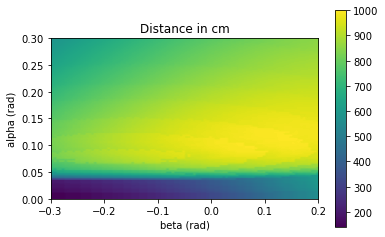

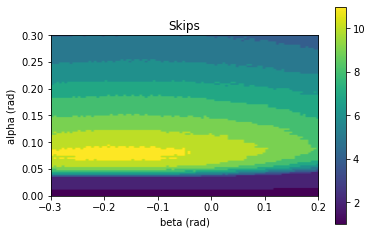

For the optimized case, alpha =  0.10303030303030303 , beta =  0.05858585858585863 :


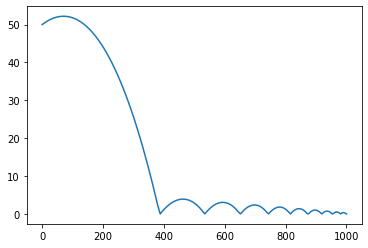

The stone skips 10 times over 1000.1765010030138 cm.


In [3]:
densityPlot.plotDensity()

If we didn't know better, these pictures have no issues and might be perfectly good results. However, the Fourth-Degree Runge-Kutta Method shows us the small errors in Euler's Method can add up quickly.

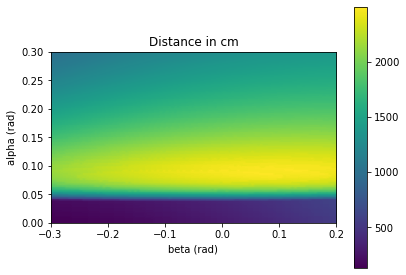

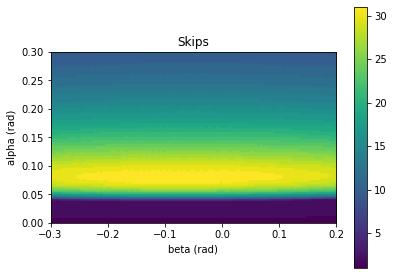

When both Skips and Dist are optimized, alpha =  0.08787878787878788 , beta =  0.06363636363636366 :


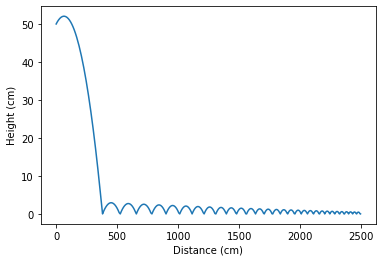

The stone skips 31 times over 2495.0481982641813 cm.
When skips is optimized, alpha =  0.0696969696969697 , beta =  -0.16868686868686866 :


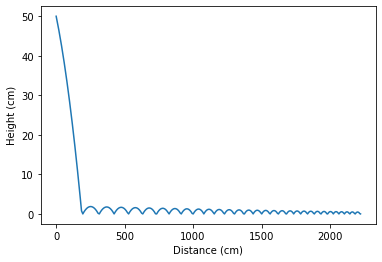

The stone skips 31 times over 2223.415036672386 cm.
When distance is optimized, alpha =  0.08787878787878788 , beta =  0.06363636363636366 :


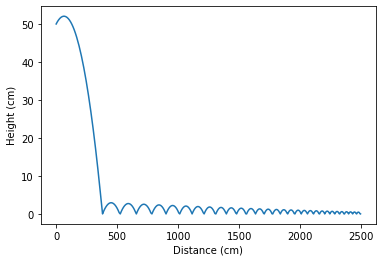

The stone skips 31 times over 2495.0481982641813 cm.


In [4]:
densityPlot2.plotDensity()

While the regions are somewhat similar between the methods, in the Fourth-degree Runge-Kutta we notice that the maximized skips region has shifted right and elongated while the maximized distance region has narrowed to a lower portion of the graph. There is really only one region that remains the same between the two methods: for $\alpha < 0.05$, we can see that the results are always in in the minimized region; however, the values of these regions are still significantly different.

Hopefully, this shows you the value in taking a little bit more time to be a whole lot more precise in your calculations. I ran these models with time steps $h = dt =0.01 s$, so the Euler's Method error is on the order of $10^{-5}$, which I would expect to be plenty accurate. Yet, when I reduce the error to be on the order of $10^{-11}$, we see that Euler's method simply does not hold true and cannot produce accurate enough results for this model.

There are of course many improvements that could be done with this project. The first that comes to mind is to add spin stability as a parameter, caluculating how the stability decreses over the stone's path and observing the affects stability has on the number of skips. Another that come to mind is a more rigorous calculation of the collision, noting that the stone is not in contact with the water for a mear instant and that the stone does indeed move in the x-direction while in contact with the water. I expect that these improvements would show that the stone is cetrainly not capable of the results found by this model, and that we should expect lesser results in an expirimental setup. However, I do belive that my model produces a good estimate of the initial trhowing conditions and that further improvements would give similar initial conditions for the maximized cases.

## References
[1]C. F. Babbs, “Stone Skipping Physics,” The Physics Teacher, vol. 57, no. 5, pp. 278–281, May 2019, doi: 10.1119/1.5098910.

[2]M. E. J. Newman, Computational Physics, Revised and Expanded, pp. 327-340. Charleston, SC: Createspace, 2013.

